In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
sns.set_style('whitegrid')

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def get_col_null_counts(df):
    return pd.DataFrame(sorted({c: df[c].isnull().sum() for c in df.columns}.items(), key=lambda x: x[1], 
                               reverse=True), columns=['Column', 'Null Count'])

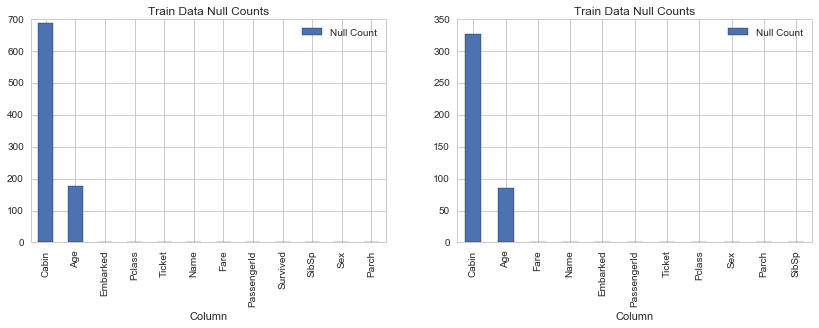

In [8]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
get_col_null_counts(train_df).plot(kind='bar', figsize=(14, 4), x='Column', y='Null Count', 
                                  title='Train Data Null Counts', ax=ax1)
get_col_null_counts(test_df).plot(kind='bar', figsize=(14, 4), x='Column', y='Null Count', 
                                 title='Train Data Null Counts', ax=ax2)

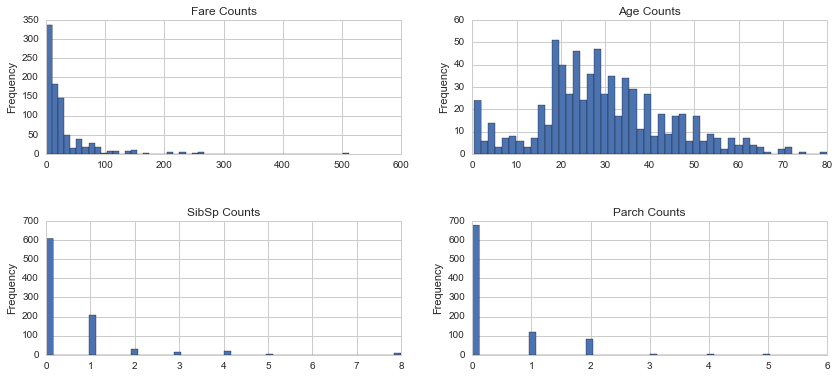

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
train_df.Fare.plot(kind='hist', bins=50, ax=ax1, figsize=(14, 6), title='Fare Counts')
train_df.Age.plot(kind='hist', bins=50, ax=ax2, figsize=(14, 6), title='Age Counts')
train_df.SibSp.plot(kind='hist', bins=50, ax=ax3, figsize=(14, 6), title='SibSp Counts')
train_df.Parch.plot(kind='hist', bins=50, ax=ax4, figsize=(14, 6), title='Parch Counts')
f.subplots_adjust(hspace=0.5)

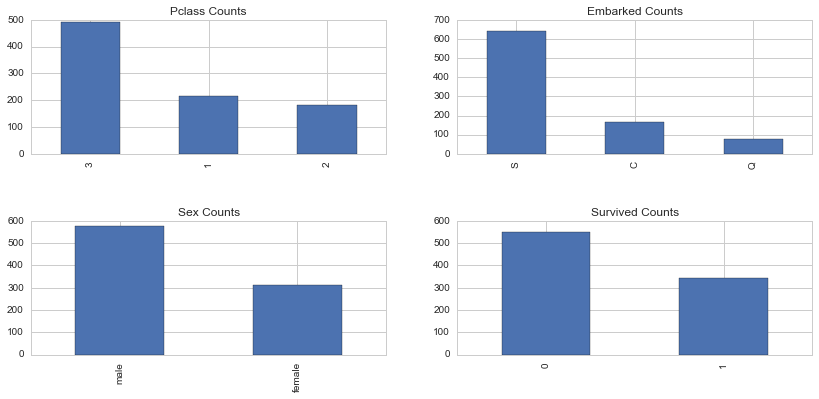

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
train_df.Pclass.value_counts().plot(kind='bar', ax=ax1, figsize=(14, 6), title='Pclass Counts')
train_df.Embarked.value_counts().plot(kind='bar', ax=ax2, figsize=(14, 6), title='Embarked Counts')
train_df.Sex.value_counts().plot(kind='bar', ax=ax3, figsize=(14, 6), title='Sex Counts')
train_df.Survived.value_counts().plot(kind='bar', ax=ax4, figsize=(14, 6), title='Survived Counts')
f.subplots_adjust(hspace=0.5)

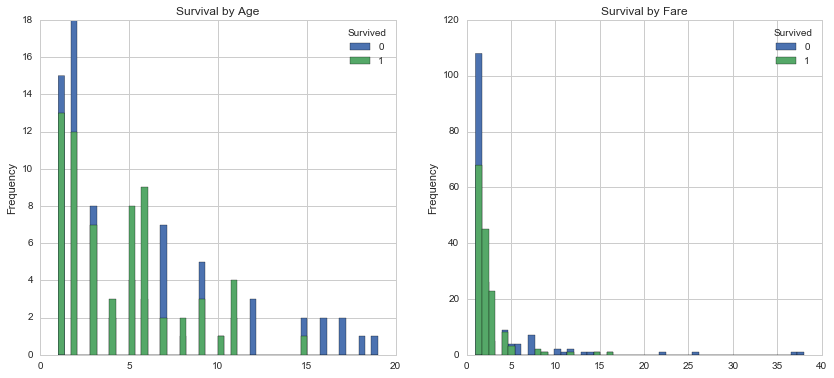

In [11]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
train_df.groupby(['Survived', 'Age']).count().unstack('Survived').PassengerId.plot(kind='hist', ax=ax1, 
                                                                                  figsize=(14, 6), bins=50, 
                                                                                  title='Survival by Age')
train_df.groupby(['Survived', 'Fare']).count().unstack('Survived').PassengerId.plot(kind='hist', ax=ax2, 
                                                                                   figsize=(14, 6), bins=50, 
                                                                                   title='Survival by Fare')

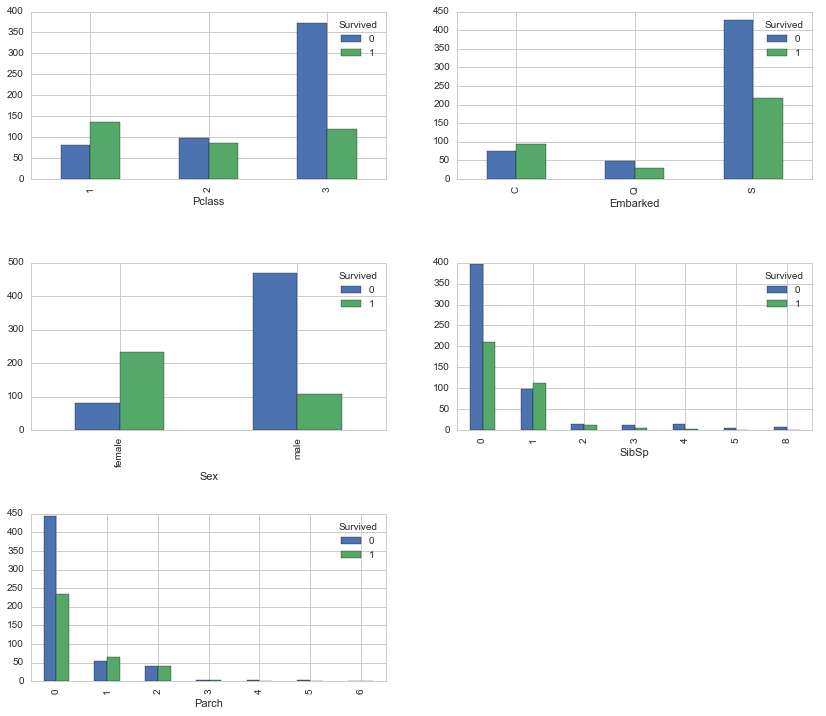

In [12]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False)
train_df.groupby(['Survived', 'Pclass']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax1, figsize=(14, 12))
train_df.groupby(['Survived', 'Embarked']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax2, figsize=(14, 12))
train_df.groupby(['Survived', 'Sex']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax3, figsize=(14, 12))
train_df.groupby(['Survived', 'SibSp']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax4, figsize=(14, 12))
train_df.groupby(['Survived', 'Parch']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax5, figsize=(14, 12))
f.subplots_adjust(hspace=0.5)
ax6.axis('off');

In [13]:
def label_categories(df, categorical_cols):
    return pd.get_dummies(df, columns=categorical_cols, drop_first=True)

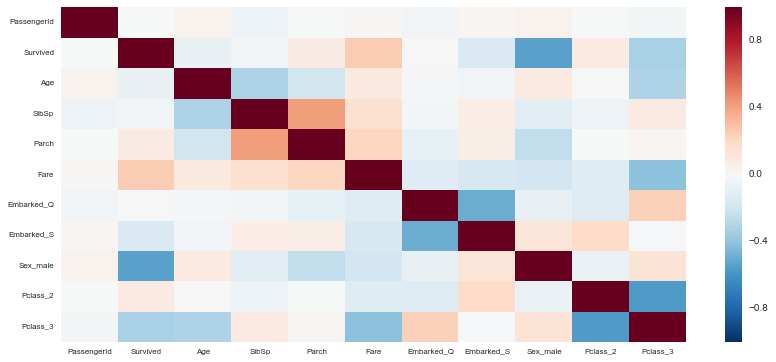

In [14]:
f, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(label_categories(train_df, ['Embarked', 'Sex', 'Pclass']).corr(), ax=ax)
ax.tick_params(labelsize=8)

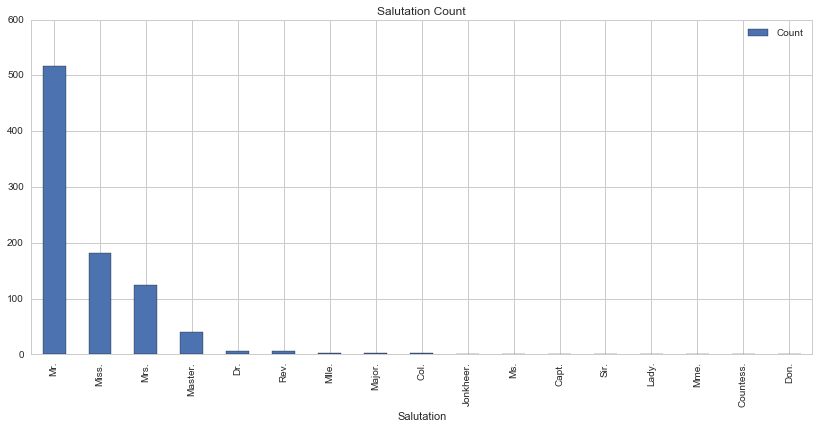

In [15]:
from collections import Counter
split_names = train_df.Name.str.split(',', expand=True)
surname_df = split_names[1].str.extract('([A-Za-z]+\.)', expand=True)
surname_counts = pd.DataFrame(sorted(Counter(surname_df[0]).items(), 
                                    key=lambda x: x[1], reverse=True), columns=['Salutation', 'Count'])
surname_counts.plot(kind='bar', x='Salutation', y='Count', figsize=(14, 6), title='Salutation Count')

In [16]:
train_df['LetterTickets'] = train_df.Ticket.astype(str).str.extract('([A-Za-z]+)', expand=False)
train_df.loc[train_df.LetterTickets.isnull(), 'LetterTicets'] = 'Other'

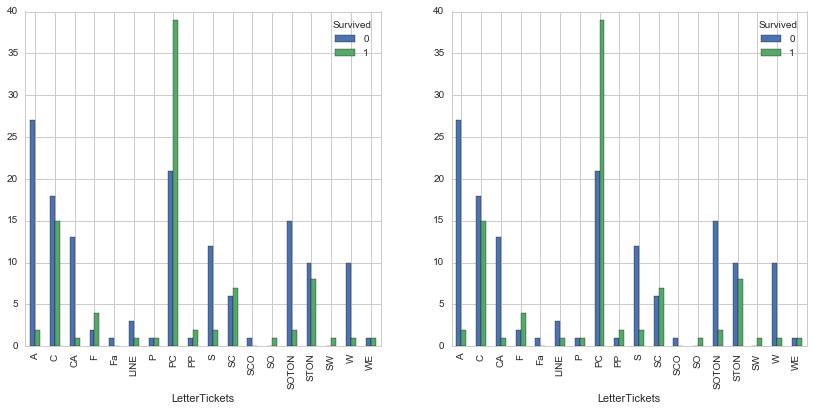

In [17]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
train_df.groupby(['Survived', 'LetterTickets']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax1, 
                                                                                             figsize=(14, 6))
train_df[train_df.LetterTickets != 'Other'].groupby(['Survived', 'LetterTickets'])\
    .count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax2, figsize=(14, 6))

In [18]:
train_df['GroupedAge'] = pd.cut(train_df.Age, 5)
train_df['GroupedAge2'] = pd.cut(train_df.Age, 10)

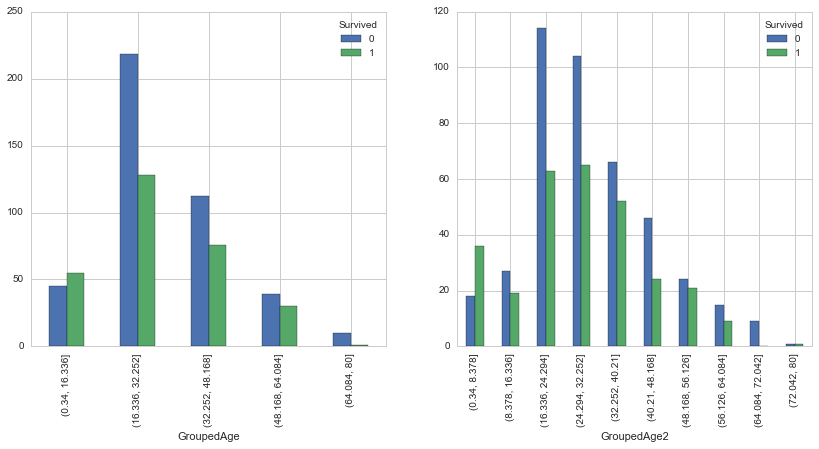

In [19]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False)
train_df.groupby(['Survived', 'GroupedAge']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax1, figsize=(14, 6))
train_df.groupby(['Survived', 'GroupedAge2']).count().unstack('Survived').PassengerId.plot(kind='bar', ax=ax2, figsize=(14, 6))

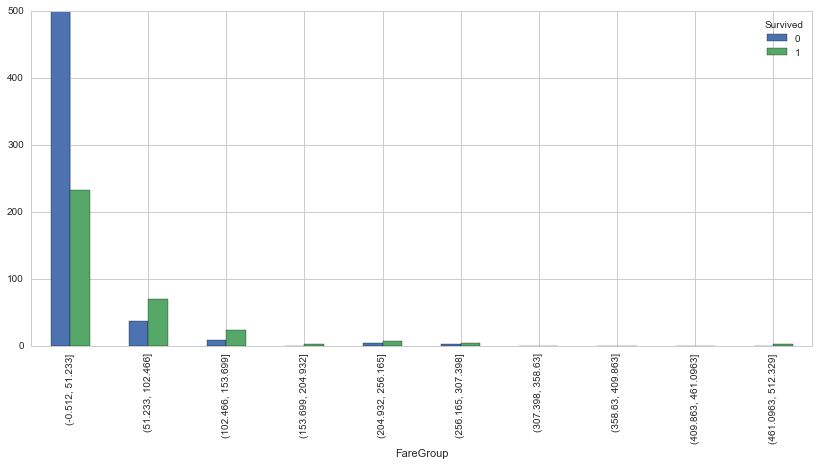

In [20]:
train_df['FareGroup'] = pd.cut(train_df.Fare, 10)
train_df.groupby(['Survived', 'FareGroup']).count().unstack('Survived').PassengerId.plot(kind='bar', figsize=(14, 6))